# 로지스틱회귀분석모델
- 다른 모델과 특이하게 선형회귀 방식과 분류 방식을 모두 사용하는 모델


- 독립변수 : 연속형데이터
- 종속변수 : 범주형데이터


### exe) 연비 및 마력(엔진출력) 데이터를 이용해서 변속기(자동/수동) 유무 예측
- 독립변수 : 연비, 마력(엔진출력)
- 종속변수 : 변속기(자동:0/수동:1) 

In [1]:
## 라이브러리
# 실행 오류 시 pip install statsmodels
# 자동차 연비 데이터를 가지고 있는 라이브러리
import statsmodels.api as sm

In [3]:
## 데이터 생성
# 변속기 : am
# 마력 : hp
# 연비 : mpg
mtcars = sm.datasets.get_rdataset('mtcars').data
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
## 모델 라이브러리 생성
import statsmodels.formula.api as smf

In [7]:
## 종속변수와 독립변수 정의
formula = 'am ~ mpg + hp'

# 모델 객체 생성
result = smf.logit(formula = formula, data = mtcars)

# 학습모델 생성
result = result.fit()
# @ Optimization terminated successfully : 최적화 성공 메세지
# @ Current function value : 독립변수가 분류결정에 미치는 영향의 정도
# - 0.5에 가까울 수록 좋음
# - 현재 모델의 성능 점수 : 0.3
# - lterations : 결과를 도출하는데 반복한 횟수 (9번 반복해서 최종 학습 종료)
print('result.fit() 결과 = \n', result)

## 학습결과 확인
# coef : 기울기
#  - 기울기 값이 음수 : 0(자동)을 선택할 확률(0에 가까워질수록 자동일 확률)
#  - 기울기 값이 양수 : 1(수동)을 선택할 확률(1에 가까워질수록 수동일 확률)
# std err : 표준편차
# P>|z| : p-value(유의미값) < 0.05이면 좋음, 0.05보다 크면 안좋음
#  - p-value < 0.05 : 유의미하다
print('summary() = \n', result.summary())

Optimization terminated successfully.
         Current function value: 0.300509
         Iterations 9
result.fit() 결과 = 
summary() = 
                            Logit Regression Results                           
Dep. Variable:                     am   No. Observations:                   32
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            2
Date:                Mon, 25 Jul 2022   Pseudo R-squ.:                  0.5551
Time:                        14:32:22   Log-Likelihood:                -9.6163
converged:                       True   LL-Null:                       -21.615
Covariance Type:            nonrobust   LLR p-value:                 6.153e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.6052     15.077     -2.229      0.026     -63.156      -4.

In [ ]:
# 머신러닝에서 사용되는 독립변수들은 독립적인 관계를 가져야 합니다.
# 연관성이 없을 수록 좋습니다. (p-value < 0.05)
# 단, 상관관계(인과성)는 높을 수록 좋습니다. (다른 데이터에 영향을 미치는 정도)

In [9]:
## 예측(테스트)
import numpy as np

# 테스트데이터로 데이터프레임 전체 넣기
pred = result.predict(mtcars)

print('예측값 = \n', np.around(pred))
print('---------------------------------------------')
print('실제값 = \n', np.around(mtcars['am']))

예측값 = 
 Mazda RX4              0.0
Mazda RX4 Wag          0.0
Datsun 710             1.0
Hornet 4 Drive         0.0
Hornet Sportabout      0.0
Valiant                0.0
Duster 360             0.0
Merc 240D              1.0
Merc 230               1.0
Merc 280               0.0
Merc 280C              0.0
Merc 450SE             0.0
Merc 450SL             0.0
Merc 450SLC            0.0
Cadillac Fleetwood     0.0
Lincoln Continental    0.0
Chrysler Imperial      0.0
Fiat 128               1.0
Honda Civic            1.0
Toyota Corolla         1.0
Toyota Corona          0.0
Dodge Challenger       0.0
AMC Javelin            0.0
Camaro Z28             0.0
Pontiac Firebird       1.0
Fiat X1-9              1.0
Porsche 914-2          1.0
Lotus Europa           1.0
Ford Pantera L         1.0
Ferrari Dino           1.0
Maserati Bora          1.0
Volvo 142E             0.0
dtype: float64
---------------------------------------------
실제값 = 
 Mazda RX4              1
Mazda RX4 Wag          1
Datsun 71

### 지표별 모델 성능 평가

In [ ]:
## ROC(Receiver Operation Charcterlistic : 모델 성능 평가 지표)
#  - 여러 임계값들을 기준으로 재현율(Recall), 양선율(Fallout)의 변화를 시각화
# <성능평가 순사>
# 1) 혼동 행렬표(confustion_matirx) 생성 : 예측 결과 데이터 이용
# 2) 정확도, 정밀도, 재현율(TPR), 특이도, 양선율(FPR) 계산
# 3) ROC Curve 시각화 : x축(양선율(FPR)), y축(재현율(TPR)) 사용
# 4) ROC 면적 계산

In [15]:
# TP(True Positive) : 실제값 적군을 예측값 적군으로 잘 예측한 개수(정확하게 탐지)
# FN(False Negative) : 실제값 아군을 예측값 아군으로 잘 예측한 개수(일상적인 탐지)
# TN(True Negative) : 실제값 적군을 예측값 아군으로 잘못 예측한 개수(미탐지 - 적이 뚫고 들어옴)
#  - 재현율에 영향을 미침(조금 나쁨 ; 2종오류)
# FP(False Positive) : 실제값 아군을 예측값 적군으로 잘못 예측한 개수(오탐지 - 아군끼리 싸움)
#  - 정밀도 및 특이도에 영향을 미치는 값(매우 나쁨 ; 1종오류)

In [13]:
## 분류 정확도 확인
conf_tab = result.pred_table()
print(conf_tab)

[[16.  3.]
 [ 3. 10.]]


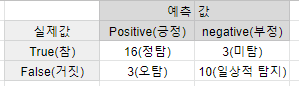

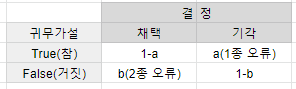

#### 분류정확도

In [22]:
## 분류 정확도 계산
# 정확도(accuracy) = (TP + FN) / 전체개수
accuracy = (conf_tab[0][0] + conf_tab[1][1]) / len(mtcars)
print('분류정확도 = ', accuracy)

분류정확도 =  0.8125


In [17]:
from sklearn.metrics import accuracy_score
import numpy as np

accuracy_score = accuracy_score(mtcars['am'], np.around(pred))
print('라이브러리 정확도 = ', accuracy_score)

라이브러리 정확도 =  0.8125


#### 정밀도

In [19]:
# 정밀도 = TP / (TP+FP)
#  - 예측을 얼마나 정밀하게 하는지 확인
#  - 0~1 사이 값을 가지며, 높을 수록 좋음
#  - 정밀도가 1이라면 FP(오탐)가 0건이라는 의미; 오탐이 없다
#  - 학술 및 연구에서는 정밀도를 높이는 것이 좋음
pecision = conf_tab[0][0] / (conf_tab[0][0] + conf_tab[1][0])
print('정밀도 = ', pecision)

정밀도 =  0.8421052631578947


#### 재현율(Recall : TPR)

In [24]:
# 재현율(recall) = TP / (TP+FN)
#  - 양성인 케이스에 대해 양성으로 잘 예측한 비율
#  - 값이 1에 가까울 수록 좋음
#  - 재현율이 1에 가까울 수록 좋음
#  - 재현율이 1이면 FN이 0건이라는 의미; 미탐이 없다
#  - 현장에선 재현율을 높이는 것이 좋음
recall_TPR = conf_tab[0][0] / (conf_tab[0][0] + conf_tab[1][1])
print('재현율 = ', recall_TPR)

재현율 =  0.6153846153846154


#### 양선율(fallout : FPR)

In [26]:
# 양선율(fallout) = FP / (FP+TN)
#  - 음성인 케이스에 대해 양성으로 잘못 예측한 비율
#  - 정상을 비정상으로 판단한 경우로 현실에서 가장 위험
fallout_FPR = conf_tab[1][0] / (conf_tab[1][0] + conf_tab[0][1])
print('양선율 = ', fallout_FPR)

양선율 =  0.5


### 전체코드

In [ ]:
# 자동차 연비 데이터를 가지고 있는 라이브러리를 활용하여 데이터 생성
import statsmodels.api as sm
mtcars = sm.datasets.get_rdataset('mtcars').data

## 모델 라이브러리
import statsmodels.formula.api as smf

## 종속변수와 독립변수 정의
formula = 'am ~ mpg + hp'

## 모델 객체 생성
result = smf.logit(formula = formula, data = mtcars)

## 학습모델 생성
result = result.fit()

## 학습결과 확인
print('summary() = \n', result.summary())

## 예측(테스트)
import numpy as np
pred = result.predict(mtcars)